## SET UP

In [1216]:
import matplotlib.pyplot as plt

In [1217]:
import numpy as np

In [1218]:
import pandas as pd

In [1219]:
data = pd.read_csv("DOC001.csv")

In [1220]:
data.describe()

,Time,Inside-Temp,Humidity,Red,Green,Blue,Out-Temp,Out1-Temp,Pressure,Depth,Altitude
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,1.600000e+01,16.000000,1.600000e+01,16.000000
mean,8.500000,22.643750,63.056250,446.562500,390.875000,201.312500,20.68625,2.158000e+01,1000.300000,-1.300000e-01,108.316875
std,4.760952,0.141274,15.249829,218.919458,244.460733,121.038131,0.01500,7.338454e-15,0.233809,5.733167e-17,1.967990
min,1.000000,22.400000,53.400000,129.000000,120.000000,60.000000,20.63000,2.158000e+01,1000.000000,-1.300000e-01,104.950000
25%,4.750000,22.575000,54.225000,283.250000,174.750000,100.750000,20.69000,2.158000e+01,1000.100000,-1.300000e-01,106.630000
50%,8.500000,22.650000,55.550000,433.500000,289.500000,158.000000,20.69000,2.158000e+01,1000.250000,-1.300000e-01,108.740000
75%,12.250000,22.700000,62.800000,658.500000,661.500000,322.250000,20.69000,2.158000e+01,1000.500000,-1.300000e-01,110.000000
max,16.000000,23.000000,99.900000,728.000000,749.000000,393.000000,20.69000,2.158000e+01,1000.700000,-1.300000e-01,110.840000


## Restrictions--Data Normalizing  (Not RGB)

In [1221]:
data = data[data["Inside-Temp"] != -999]

In [1222]:
data = data[data["Out-Temp"] != 999]

In [1223]:
data.describe()

,Time,Inside-Temp,Humidity,Red,Green,Blue,Out-Temp,Out1-Temp,Pressure,Depth,Altitude
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,1.600000e+01,16.000000,1.600000e+01,16.000000
mean,8.500000,22.643750,63.056250,446.562500,390.875000,201.312500,20.68625,2.158000e+01,1000.300000,-1.300000e-01,108.316875
std,4.760952,0.141274,15.249829,218.919458,244.460733,121.038131,0.01500,7.338454e-15,0.233809,5.733167e-17,1.967990
min,1.000000,22.400000,53.400000,129.000000,120.000000,60.000000,20.63000,2.158000e+01,1000.000000,-1.300000e-01,104.950000
25%,4.750000,22.575000,54.225000,283.250000,174.750000,100.750000,20.69000,2.158000e+01,1000.100000,-1.300000e-01,106.630000
50%,8.500000,22.650000,55.550000,433.500000,289.500000,158.000000,20.69000,2.158000e+01,1000.250000,-1.300000e-01,108.740000
75%,12.250000,22.700000,62.800000,658.500000,661.500000,322.250000,20.69000,2.158000e+01,1000.500000,-1.300000e-01,110.000000
max,16.000000,23.000000,99.900000,728.000000,749.000000,393.000000,20.69000,2.158000e+01,1000.700000,-1.300000e-01,110.840000


## Data Time

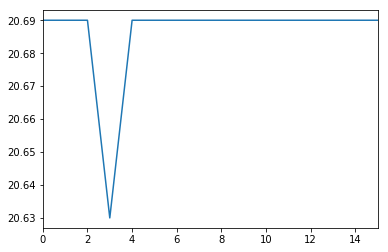

In [1224]:
data["Out-Temp"].plot()

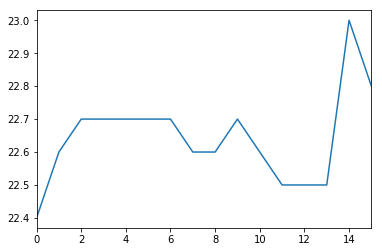

In [1225]:
data["Inside-Temp"].plot(x=data["Time"])

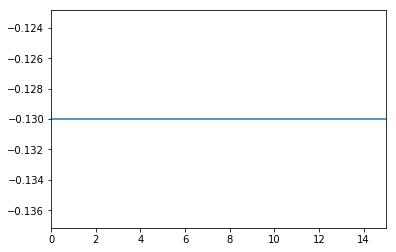

In [1248]:
data["Depth"].plot(x=data["Time"])

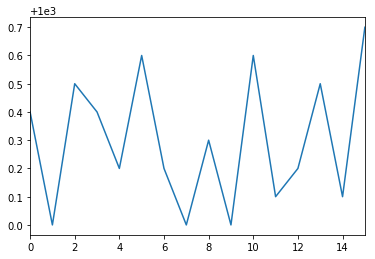

In [1249]:
data["Pressure"].plot(x=data["Time"])

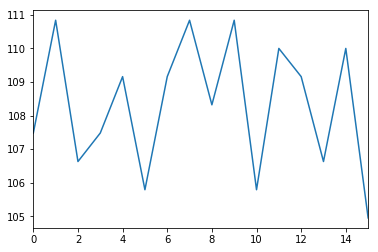

In [1247]:
data["Altitude"].plot(x=data["Time"])

In [1226]:
dataRGB = data.loc[:,["Red","Green","Blue"]]

In [1227]:
dataRGB['Red'].values[data['Red'] > 1020] = 1020

In [1228]:
dataRGB['Green'].values[data['Green'] > 1020] = 1020

In [1229]:
dataRGB['Blue'].values[data['Blue'] > 1020] = 1020

In [1230]:
dataRGBdiv4 = data.loc[:,["Red","Green","Blue"]]

In [1231]:
dataRGBdiv4 = (dataRGBdiv4 - (dataRGBdiv4 % 4))/4

In [1232]:
dataRGB = dataRGBdiv4.astype(int)

In [1233]:
subset = dataRGB[['Red', 'Green', 'Blue']]


In [1234]:
tuples = []

In [1235]:
tuples = [tuple(x) for x in subset.values]

In [1236]:
dataRGB = dataRGB[dataRGB["Red"] > 0]

In [1237]:
dataRGB = dataRGB[dataRGB["Green"] > 0]

In [1238]:
dataRGB = dataRGB[dataRGB["Blue"] > 0]

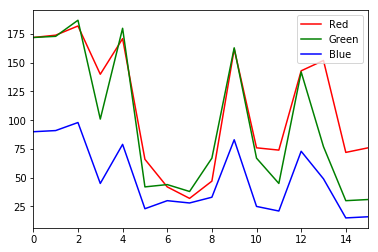

In [1239]:
dataRGB.plot(color = ['r','g','b'])

In [1240]:
#tupleDF = pd.Series([(elem1, elem2, elem3) for elem1, elem2, elem3 in tuples])

In [1241]:
dataRGBcombo = data["Red"]+data["Green"]+data["Blue"]

In [1242]:
dataRGBcombo = dataRGBcombo[1:31]

In [1243]:
dataRGBcombo.columns = ['TotalRGB']

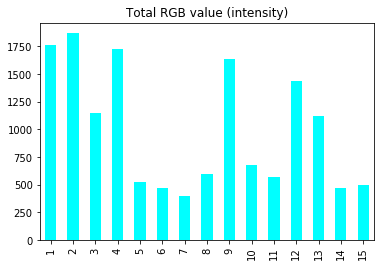

In [1244]:
dataRGBcombo.plot.bar(color=([0,1,1]),title=("Total RGB value (intensity)"))

In [1245]:
hex = []
for i in range(len(tuples)):
    a = '#%02x%02x%02x' % tuples[i]
    hex.append(a)


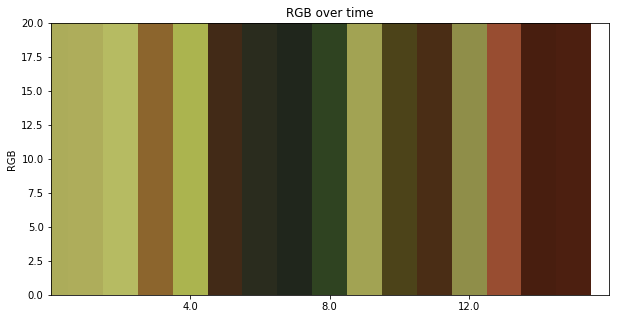

In [1246]:
pos = len(tuples)
barWidth = 1 
fig, ax = plt.subplots(figsize=(10,5))
i = 0 
while (i < pos):
    plt.bar((i), 20, width=barWidth, alpha=1, color=(hex[i])) 
    i = i + 1

ax.set_ylabel('RGB')
ax.set_title('RGB over time')
ax.set_xticks([len(tuples)/4,len(tuples)/2,(3*len(tuples)/4),26.5])

plt.xlim([0,len(tuples)])
plt.ylim([0,20])

plt.show()